<a href="https://colab.research.google.com/github/AnatoliyZhuk/Knowledge/blob/main/Introduction_To_Data_Science/IntroToDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Введение в Data Science. Курс на Stepik.<h1/>

**Глава 2. Decision Tree**


Дерево решений — тип контролируемого машинного обучения (supervised learning - обучение с учителем), который в основном используется в задачах классификации.<br/>
**Корневой узел (Root node)** — самый верхний узел в дереве решений.<br/>
**Узел принятия решения (Decision node)** — подузел, который разделяется на дополнительные подузлы.<br/>
**Лист/терминальный узел (leaf/ Terminal node)** — узел, который не разделяется на другие узлы (конец дерева).<br/>

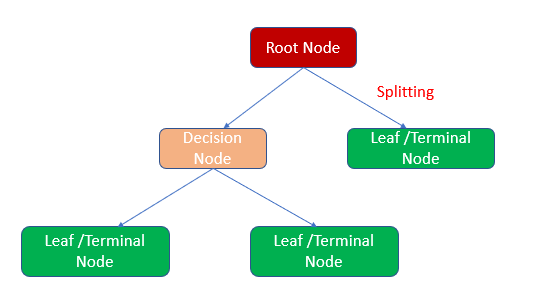

Импортируем необходимы для работы библиотеки.

In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import cross_val_score # Для кросс-валидации

Создадим DataFrame для дальнейшей работы:

Наша задача научиться предсказывать значение переменной Y, основываясь на значениях переменных X_1 и X_2.<br/>

In [2]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1],
                     'X_2': [0, 0, 0, 1, 0, 0, 0, 1],
                     'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


Задаем классификатор.

In [3]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Сделаем предобработку данных:
> X - dataframe с признаками (фичами; данные, которые мы используем для обучения)<br/>
> y - целевая переменная (та переменная, которую мы будем предсказывать)

In [4]:
X = data[['X_1', 'X_2']]
y = data.Y

Обучим дерево решений.

In [5]:
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Теперь дерево решений **clf** знает о наших данных.

Самый простой способ понять чему научилось дерево решений - визуализировать это дерево.<br/> 

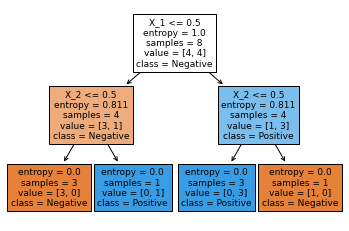

In [6]:
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Negative', 'Positive'],
               filled=True)
None

**Внимательно проанализируем визуализацию дерева решений:**<br/>
Значение **value** говорит нам, что изначально у нас есть четыре наблюдения из класса **"0"**, четыре наблюдения из класса **"1"**<br/>
В самом первом вопросе дерева мы спрашиваем, правда ли, что **X_1** меньше $\frac{1}{2}$<br/>
**Sample** показывает число наблюдений в каждый момент времени.<br/>

<h1>Энтропия<h1/>



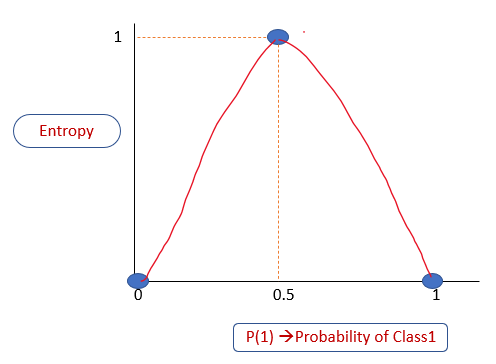

По какому принципу дерево решений производит разделение?<br/>
Чтобы понять это, рассмотрим что такое **энтропия**:<br/>
**Энтропия** - это уровень неопределенности наших данных.<br/>
Уровень энтропии колеблется от 0 до 1.<br/>
Неопределенность тем выше, чем хуже получается разделять классы. <br/>

 Общая формула для Энтропии: $E = -\sum_{i=1}^n p_i*log_{2}(p_i)$

 Допустим у нас есть случай, когда 50 % элементов относятся к одному классу и 50 % элементов к другому классу: $E = - (\frac{1}{2})*log_{2}(\frac{1}{2}) - (\frac{1}{2})*log_{2}(\frac{1}{2}) = - (\frac{1}{2})*(-1) - (\frac{1}{2})*(-1) = 1$ - максимальная степень неопределенности данных.<br/>
+ $p$ - вероятность того, что мы относим элемент к одному из классов.<br/>

Если на определенном этапе получается ситуация, когда имеются элементы только одного класса.
$E = - 1*log_{2}(-1) - (0)*log_{2}(0) = 0$
Основная идея, которой следует дерево решений - это уменьшение энтропии, при этом вариант для вилки выбирается таким образом, чтобы наибольшим образом понизить ее на каждом шаге.<br/>

Information Gain - что произошло с неопределенностью после того как мы учли значения накоторой переменной X.<br/>
$$IG = E(Y) - E(Y|X)$$ Чем больше Information Gain - тем лучше.<br/>
$n_0$ - выборка при $x = 0$<br/>
$n_1$ - выборка при $x = 1$

$n_0 + n_1 = N$<br/>
$N$ - общее количество наблюдений <br/>
$E_0$ - энтропия $x = 0$ <br/>
$E_1$ - энтропия $x = 1$
$$E(Y|X) = \frac{n_0}{N} * E_0 +  \frac{n_1}{N} * E_1 $$

<h1>Titanic - Machine Learning<h1/>

**Задача:** обучить **Decision Tree**, которое будет предсказывать выжил пассажир или нет, основываясь на тех данных про пассажиров, которые имеются. Подключим необходимые данные и выведем первые 5 значений:<br/>

In [7]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/AnatoliyZhuk/Knowledge/main/Introduction_To_Data_Science/train_Titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Посмотрим на пропущенные значения.

In [8]:
# метод isna() возвращает False (если значение не пропущено) и True (если значение пропущено)
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Отберем самые очевидные переменные для обучения модели.

In [9]:
X = titanic_data.drop(['PassengerId', 'Ticket', 'Cabin', 'Survived', 'Name'], axis=1) # axis=1 говорит, что это список с именами колонок
y = titanic_data.Survived

Алгоритм Decision Tree может работать только с числовыми данными
Воспользуемся One-code Encoding.


In [10]:
X = pd.get_dummies(X) # альтернативный вариант использовать Label Encoding

Decision Tree не умеет работать с пропущенными значениями.<br/>
Заполненим пропущенные значения медианным значением.

In [11]:
X = X.fillna({'Age' : X.Age.median()})

Обратим внимание на новые получившиеся переменные **Sex_male** и **Sex_female**<br/>
В линейных моделях наличие таких переменных (это касается всех переменных, закодированных с помощью **One-hot Encoding**) могло бы привести к проблемам, однако для деревьев решений все эти переменные можно оставить.

In [12]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


**Переобучение** - явление, когда построенная модель хорошо объясняет примеры из обучающей выборки, но относительно плохо работает на примерах, не участвовавших в обучении (на примерах из тестовой выборки).<br/>
Переобученная модель не выявляет общие закономерности, а решает задачу классификации конкретно этих пассажиров.
Чтобы бороться с переобучением нужно ограничить ресурсы дерева - отрегулировать параметры дерева так, чтобы нивилировать разницу между результатом на тренировочных данных и тестовых данных.<br/>
**titanic_tree. score(X_train, y_train)** - предсказывает число правильных ответов (accuracy)

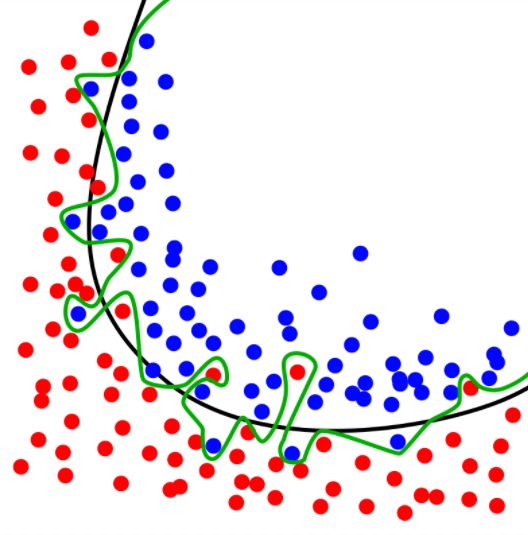

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Создадим классификатор - дерево решений и обучим его.

In [14]:
titanic_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [15]:
titanic_tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Выбрав **глубину дерева** = 5, получили примерно одинаковое значение метрики **accuracy** как на train, так и а test множестве.

In [16]:
titanic_tree.score(X_train, Y_train)

0.8439597315436241

In [17]:
titanic_tree.score(X_test, Y_test)

0.8610169491525423

Поэксперементируем с параметрами, чтобы создать dataframe с показателями качества для разных глубин деревьев и выбрать наилучший.

In [18]:
scores_data = pd.DataFrame()

In [19]:
max_depth_values = range(1, 100)
for max_depth in max_depth_values:
  titanic_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
  titanic_tree.fit(X_train, Y_train)
  train_score = titanic_tree.score(X_train, Y_train)
  test_score = titanic_tree.score(X_test, Y_test)
  mean_cross_val_score = cross_val_score(titanic_tree, X_train, Y_train, cv=5).mean() # средняя точность на кросс-валидации

  temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 'train_score' : [train_score], 'test_score' : [test_score], 'cross_val_score' : [mean_cross_val_score]})
  scores_data = scores_data.append(temp_score_data)

In [20]:
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.795350
...,...,...,...,...
0,95,0.979866,0.769492,0.770182
0,96,0.979866,0.759322,0.770182
0,97,0.979866,0.766102,0.763459
0,98,0.979866,0.759322,0.775224


Метод **melt** позволяет изменить формат dataframe'a, расположив результаты колонок **train_score,	test_score,	cross_val_score** друг за другом.

In [21]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                           var_name='set_type', value_name='score')
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
292,95,cross_val_score,0.770182
293,96,cross_val_score,0.770182
294,97,cross_val_score,0.763459
295,98,cross_val_score,0.775224


In [22]:
scores_data_long.query("set_type == 'cross_val_score'").head(15)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.795350
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.800378
205,8,cross_val_score,0.797003
206,9,cross_val_score,0.802031
207,10,cross_val_score,0.798669


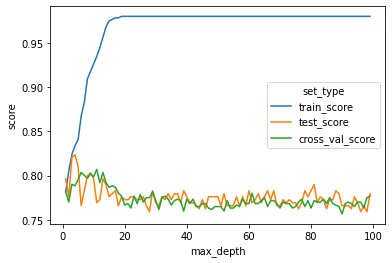

In [23]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

<h1>Кросс-валидация<h1>

Данные, которые доступны для манипуляций и в которых есть результат (целевая переменная), обычно обозначаются как **train.csv**.<br/>
Разделяем эти данные на тренировочные и тестовые, тестовые данные откладываем в сторону. Тренировочные данные делим на части (обычно это 3 или 5 равных частей) и шаг за шагом обучаем нашу модель на **k-1** частях и тестируем на оставшейся, делаем так пока все части не побывают в роли части для тестирования. После этого усредняем показатели accuracy от всего процесса.

In [24]:
titanic_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [25]:
cross_val_score(titanic_tree, X_train, Y_train, cv=5).mean() # средняя точность на кросс-валидации

0.7886274509803922

Используя цикл и кросс-валидацию определили, что **наилучшая глубина дерева=11**<br/>
Сделая все это, нужно сказать, что мы оптимизировали **accuracy**, но здесь это плохая метрика.

<h1> Метрики качества модели (2.5) <h1>




**Метрики качества модели** - метрики, при помощи которой можно понять насколько хорошо модель справляется с задачей классификации.<br/>

**Работа с несбалансированными выборками**

+ Можно считать, что выборка несбалансирована, когда размеры классов отличаются более, чем в 10 раз. 
+ Больший класс называют доминирующим, меньший класс называется минорным
+ Зачастую можно повысить качество с помощью
 + Корректировки весов объектов
 + Исскуственной модификации датасета

**Ошибка 1 и 2 рода**<br/>
**Ошибка первого рода (ложная тревога)** — ситуация, когда отвергнута правильная нулевая гипотеза. <br/>
**Ошибка второго рода (пропуск цели)** — ситуация, когда принята неправильная нулевая гипотеза.<br/>
Проанализируем картинку: $H_0$ - человек не беремен.<br/>
В случае мужчины нулевая гипотеза "человек не беремен" неверно отвергнута.<br/>
В случае женщины нулевая гипотеза "человек не беремен" неверно принята.<br/>

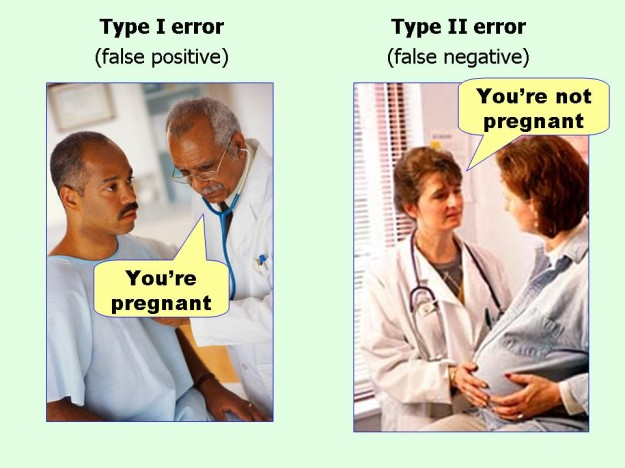

Мы рассмотрим метрики, при помощи которых мы можем понять насколько хорошо модель справляется с задачей классификации.
**Пояснение**: <br/>
TP - True Positive (истино-положительное решение); FP - False Positive (ложно-положительное решение);<br/>
TN - True Negative (истино-отрицательное решение); FN - False Negative (ложно-отрицательное решение); 

<br/> 
 + **Accuracy** - общий процент правильных ответов.<br/> 
 Формула: $Accuracy = \frac{TP + TN}{TP + FP + TN + FN}$
  + Зачастую не очень эффективная метрика. Так если для нашей задачи используются несбалансированые данные, например, мы предсказываем какой процент человек закончит курс на Stepik (определим, что обычно курс не заканчивают 90% человек), тогда если наша модель скажет, что курс никто не закончил, то показатель метрики accuracy = 0.9.  <br/>



 + **Precision** - насколько хорошо удается находить положительные классы, не переплачивая за это ложными срабатываниями. <br/>
Но эта метрика никак не отвечает на вопрос насколько в целом получается находить положительные примеры.<br/>
 Формула: $Precision = \frac{TP}{TP + FP}$

Пусть есть база на которую нападают вражеские самолеты, наша задача их классифицировать <br/>
Если каждый самолет будет успешно детектирован, тогда TP - наша гипотеза, что это самолет подтвердилась, FP - наша гипотеза, что это самолет не подтвердилась.

 + **Recall** - правда ли, что мы нашли все примеры положительного класса <br/>
 Но эта метрика не несет информации о том насколько мы перепатили заэто ложными срабатываниями.<br/>
 Формула: $Recall = \frac{TP}{TP + FN}$

 FN - наша гипотеза, что это не самолет не подтвердилась (на самом деле самолет был, то есть пропуск - мы не заметили вражеский самолет).

 + **Recall** и **Precision** взаимно изолированы друг от друга. В зависимости от того, какую задачу мы решаем, мы также решаем какую из метрик мы будем оптимизировать. <br/>


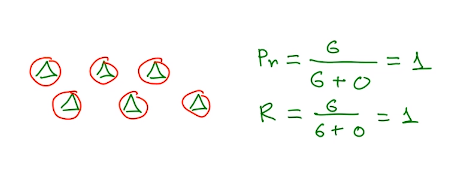

Здесь видим, что FP - (гипотеза, что это самолет не подтвердилась) = 7, что в свою очередь влияет на метрику качества **Precision**.<br/>
Радар настроен слишком чувствительно, то есть слишком реагирует на шумы. <br/>

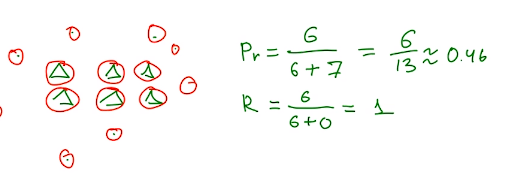

Здесь видим другую ситуацию, когда радар настроен плохо и не может детектировать некоторые самолеты.

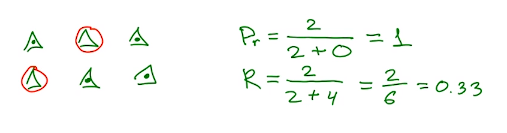

Комбинированная между **Precision** и **Recall** метрика называется **F-мера** <br/>
 Формула: $\frac{2*Precision * Recall}{Precision + Recall}$ <br/>
**F-мера** используется, когда мы хотим получить лучшее от совокупности этих 2 метрик качества. <br/>
На практике этот параметр выглядит следующим образом: <br/><br/><br/>
Мы устроились аналитиком в Tinder (сайт знакомств). В реальном продукте задача никогда не формулируется с точки зрения оптимизации какой-то метрики качества - оптимизироваться должны метрики продукта. <br/>
Мы хотим внедрить машинное обучение, чтобы метрики продукта стали лучше. 
+ Приток новой аудитории
+ Покупки пользователей
+ Удовлетворенность пользователей <br/> 
Нужно найти хитрое равновесие, потому что если человек сразу найдет себе нужного человека, он уйдет с сайта, это компании не нужно.

<h1>Подбор параметров<h1/>

**GridSearchCV** - позволяет взять модель и набор параметров, которые мы хотим проверить и при помощи кросс-валидации отобрать такой набор параметров, которая дает наилучший результат.<br/>
В качестве результата можно указывать разные метрики.


In [36]:
parametrs = {'criterion' : ['gini', 'entropy'], 'max_depth' : range(1, 30)}

In [37]:
from sklearn.model_selection import GridSearchCV
clf = tree.DecisionTreeClassifier()
grid_search_cv_clf = GridSearchCV(clf, param_grid=parametrs, cv=5)

In [39]:
grid_search_cv_clf.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [40]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [42]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
best_clf.score(X_test, Y_test)

0.7661016949152543

**Глава 3. Random Forest и Нейронные сети**

**Decision Tree** - очень переобучаемый алгоритм. Решением этой проблемы является подбор параметров дерева.

<h1>Трюки в Pandas<h1/>

In [ ]:
import numpy as np
import pandas as pd

Загрузим dataset, содержащий информацию о фильмах.

In [ ]:
movie = pd.read_csv('https://raw.githubusercontent.com/AnatoliyZhuk/Knowledge/main/Introduction_To_Data_Science/movie_metadata.csv')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Для простоты отберем некоторые колонки (название фильма и жанр) из этого DataFrame'а.<br/>


In [ ]:
genres = movie[['movie_title', 'genres']]
genres.head(2545)

,movie_title,genres
0,Avatar,Action|Adventure|Fantasy|Sci-Fi
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy
2,Spectre,Action|Adventure|Thriller
3,The Dark Knight Rises,Action|Thriller
4,Star Wars: Episode VII - The Force Awakens ...,Documentary
...,...,...
2540,Dumb & Dumber,Comedy
2541,When Harry Met Sally...,Comedy|Drama|Romance
2542,The Verdict,Drama
2543,Road Trip,Comedy


Нам необходимо применить функцию к каждой из ячеек этого dataframe.<br/>
Самый примитивный способ это сделать - это итерация по dataframe.

По умолчанию мы итерируемся по названиям столбцов.<br/>


In [ ]:
for i in genres:  # можно использовать атрибут columns (genres.columns)
  print(i)

movie_title
genres


In [ ]:
genres.values['Avatar']

IndexError: ignored

Чтобы получить доступ к элементам dataframe, необходимо вызвать атрибут **values**.

In [ ]:
for row in genres.values[:100]:
  for value in row:
    print(value)

Avatar 
Action|Adventure|Fantasy|Sci-Fi
Pirates of the Caribbean: At World's End 
Action|Adventure|Fantasy
Spectre 
Action|Adventure|Thriller
The Dark Knight Rises 
Action|Thriller
Star Wars: Episode VII - The Force Awakens             
Documentary
John Carter 
Action|Adventure|Sci-Fi
Spider-Man 3 
Action|Adventure|Romance
Tangled 
Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance
Avengers: Age of Ultron 
Action|Adventure|Sci-Fi
Harry Potter and the Half-Blood Prince 
Adventure|Family|Fantasy|Mystery
Batman v Superman: Dawn of Justice 
Action|Adventure|Sci-Fi
Superman Returns 
Action|Adventure|Sci-Fi
Quantum of Solace 
Action|Adventure
Pirates of the Caribbean: Dead Man's Chest 
Action|Adventure|Fantasy
The Lone Ranger 
Action|Adventure|Western
Man of Steel 
Action|Adventure|Fantasy|Sci-Fi
The Chronicles of Narnia: Prince Caspian 
Action|Adventure|Family|Fantasy
The Avengers 
Action|Adventure|Sci-Fi
Pirates of the Caribbean: On Stranger Tides 
Action|Adventure|Fantasy
Men in Bl